Fetching the data

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.dataLoader import loadSession
from src.features import *


In [4]:
#loading the session data for MONZA 2024

fp1 = loadSession(2024, 'Monza', 'FP1')
fp2 = loadSession(2024, 'Monza', 'FP2')
fp3 = loadSession(2024, 'Monza', 'FP3')
quali = loadSession(2024, 'Monza', 'Q')
race = loadSession(2024, 'Monza', 'R')

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '12', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using ca

In [5]:
df = getBestLaps(fp1)
df = df.merge(getAvg_top3Laps(fp2), on="Driver", how="outer")
df = df.merge(getAvg_top3Laps(fp3), on="Driver", how="outer")
df = df.merge(getQualiResults(quali), on="Driver", how="outer")
df = df.merge(getRacePositions(race), on="Driver", how="outer")
df.sort_values('Race_result', inplace=True)


In [6]:
df.sort_values('Race_result', inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,0 days 00:01:21.904000,0 days 00:01:21.317666666,0 days 00:01:20.390333333,4.0,1
1,MAG,0 days 00:01:22.572000,0 days 00:01:22.349666666,0 days 00:01:21.412000,13.0,10
2,ALO,0 days 00:01:22.315000,0 days 00:01:22.036666666,0 days 00:01:21.143333333,11.0,11
3,COL,0 days 00:01:22.880000,0 days 00:01:22.049333333,0 days 00:01:21.484666666,18.0,12
4,RIC,0 days 00:01:22.605000,0 days 00:01:21.996000,0 days 00:01:21.586666666,12.0,13
5,OCO,0 days 00:01:22.880000,0 days 00:01:22.075000,0 days 00:01:21.441333333,15.0,14
6,GAS,0 days 00:01:22.763000,0 days 00:01:22.259666666,0 days 00:01:21.396333333,14.0,15
7,BOT,0 days 00:01:22.127000,0 days 00:01:22.175333333,0 days 00:01:21.816000,19.0,16
8,HUL,0 days 00:01:23.157000,0 days 00:01:22.088000,0 days 00:01:21.064000,10.0,17
9,ZHO,0 days 00:01:22.854000,0 days 00:01:22.761333333,0 days 00:01:22.588666666,20.0,18


In [8]:
from src.preProcessing import processFeatures

df_clean = processFeatures(df)
df_clean.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,0 days 00:01:21.904000,81.317667,80.390333,4.0,1
1,MAG,0 days 00:01:22.572000,82.349667,81.412000,13.0,10
2,ALO,0 days 00:01:22.315000,82.036667,81.143333,11.0,11
3,COL,0 days 00:01:22.880000,82.049333,81.484667,18.0,12
4,RIC,0 days 00:01:22.605000,81.996000,81.586667,12.0,13
5,OCO,0 days 00:01:22.880000,82.075000,81.441333,15.0,14
6,GAS,0 days 00:01:22.763000,82.259667,81.396333,14.0,15
7,BOT,0 days 00:01:22.127000,82.175333,81.816000,19.0,16
8,HUL,0 days 00:01:23.157000,82.088000,81.064000,10.0,17
9,ZHO,0 days 00:01:22.854000,82.761333,82.588667,20.0,18


In [9]:
df["Practice 1_BestLap"] = pd.to_timedelta(df["Practice 1_BestLap"], errors="coerce")
df["Practice 1_BestLap"] = df["Practice 1_BestLap"].dt.total_seconds()

df_clean = df[df["Race_result"].apply(lambda x: str(x).isdigit())].copy()
df_clean["Race_result"] = df_clean["Race_result"].astype(int)

In [10]:
df.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,81.904,81.317667,80.390333,4.0,1
1,MAG,82.572,82.349667,81.412000,13.0,10
2,ALO,82.315,82.036667,81.143333,11.0,11
3,COL,82.880,82.049333,81.484667,18.0,12
4,RIC,82.605,81.996000,81.586667,12.0,13
5,OCO,82.880,82.075000,81.441333,15.0,14
6,GAS,82.763,82.259667,81.396333,14.0,15
7,BOT,82.127,82.175333,81.816000,19.0,16
8,HUL,83.157,82.088000,81.064000,10.0,17
9,ZHO,82.854,82.761333,82.588667,20.0,18


Preparing the features and target

In [11]:
from sklearn.model_selection import train_test_split

df_clean1 = df_clean.copy()
X = df_clean1.drop(columns=["Driver", "Race_result"])
y = df_clean1["Race_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

using xg-boost for model training

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 3.04


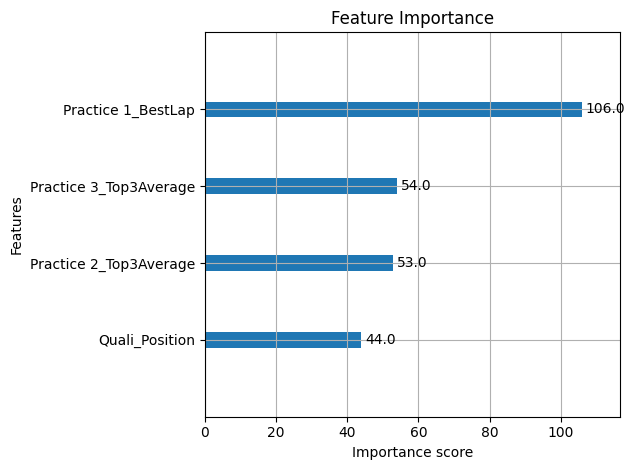

In [13]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [14]:
df_dynamics = pd.read_csv("../data/processed/monza_2024_full_features.csv")

In [15]:
df_dynamics.head()

,maxSpeed,avgCornerSpeed,avgThrottle,avgBrake,Driver
0,347.0,110.656250,80.408497,0.114379,NOR
1,346.0,112.472222,79.922559,0.117845,PIA
2,348.0,111.906250,83.085987,0.117834,RUS
3,351.0,109.818182,82.624204,0.136943,LEC
4,351.0,110.714286,80.786624,0.146497,SAI


In [16]:
for col in df_dynamics.columns:
    print(col)


maxSpeed
avgCornerSpeed
avgThrottle
avgBrake
Driver


In [18]:
for col in df_clean.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result


In [20]:
df_combined = pd.merge(
    df_clean,
    df_dynamics,
    on="Driver",
    how="inner"  
)
for col in df_combined.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result
maxSpeed
avgCornerSpeed
avgThrottle
avgBrake


getting more data for more context

In [21]:
from fastf1.ergast import Ergast

ergast = Ergast()
season_data = ergast.get_driver_standings(season=2024).content[0]
print ("Season data: \n")
for col in season_data.columns:
    print(col)

Season data: 

position
positionText
points
wins
driverId
driverNumber
driverCode
driverUrl
givenName
familyName
dateOfBirth
driverNationality
constructorIds
constructorUrls
constructorNames
constructorNationalities


In [22]:
print ("Team Data : \n")
team_data = ergast.get_constructor_standings(season=2024).content[0]
for col in team_data.columns:
    print(col)

Team Data : 

position
positionText
points
wins
constructorId
constructorUrl
constructorName
constructorNationality


In [23]:
driver_standings = ergast.get_driver_standings(season=2024)
season_data = driver_standings.content[0]  
df_driver_context = season_data.rename(columns={
    'driverCode': 'Driver',
    'points': 'DriverPoints',
    'wins': 'DriverWins',
    'constructorNames': 'Constructor'
})[['Driver', 'DriverPoints', 'DriverWins', 'Constructor']]

df_driver_context['Constructor'] = df_driver_context['Constructor'].apply(lambda x: x[0])
df_driver_context.head()

,Driver,DriverPoints,DriverWins,Constructor
0,VER,437.0,9,Red Bull
1,NOR,374.0,4,McLaren
2,LEC,356.0,3,Ferrari
3,PIA,292.0,2,McLaren
4,SAI,290.0,2,Ferrari


In [24]:
for col in df_combined.columns:
    for col2 in df_driver_context.columns:
        if col == col2:
            print(f"Column {col} exists in both dataframes.")

Column Driver exists in both dataframes.


In [25]:
df_final = df_combined.merge(df_driver_context, on='Driver', how='left')
df_final.head()


,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result,maxSpeed,avgCornerSpeed,avgThrottle,avgBrake,DriverPoints,DriverWins,Constructor
0,LEC,81.904,81.317667,80.390333,4.0,1,351.0,109.818182,82.624204,0.136943,356.0,3,Ferrari
1,MAG,82.572,82.349667,81.412000,13.0,10,351.0,109.606061,80.883117,0.129870,16.0,0,Haas F1 Team
2,ALO,82.315,82.036667,81.143333,11.0,11,354.0,107.181818,77.938983,0.142373,70.0,0,Aston Martin
3,COL,82.880,82.049333,81.484667,18.0,12,348.0,109.694444,77.547945,0.150685,5.0,0,Williams
4,RIC,82.605,81.996000,81.586667,12.0,13,353.0,110.400000,81.126667,0.106667,12.0,0,RB F1 Team


In [26]:
for col in df_final.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result
maxSpeed
avgCornerSpeed
avgThrottle
avgBrake
DriverPoints
DriverWins
Constructor


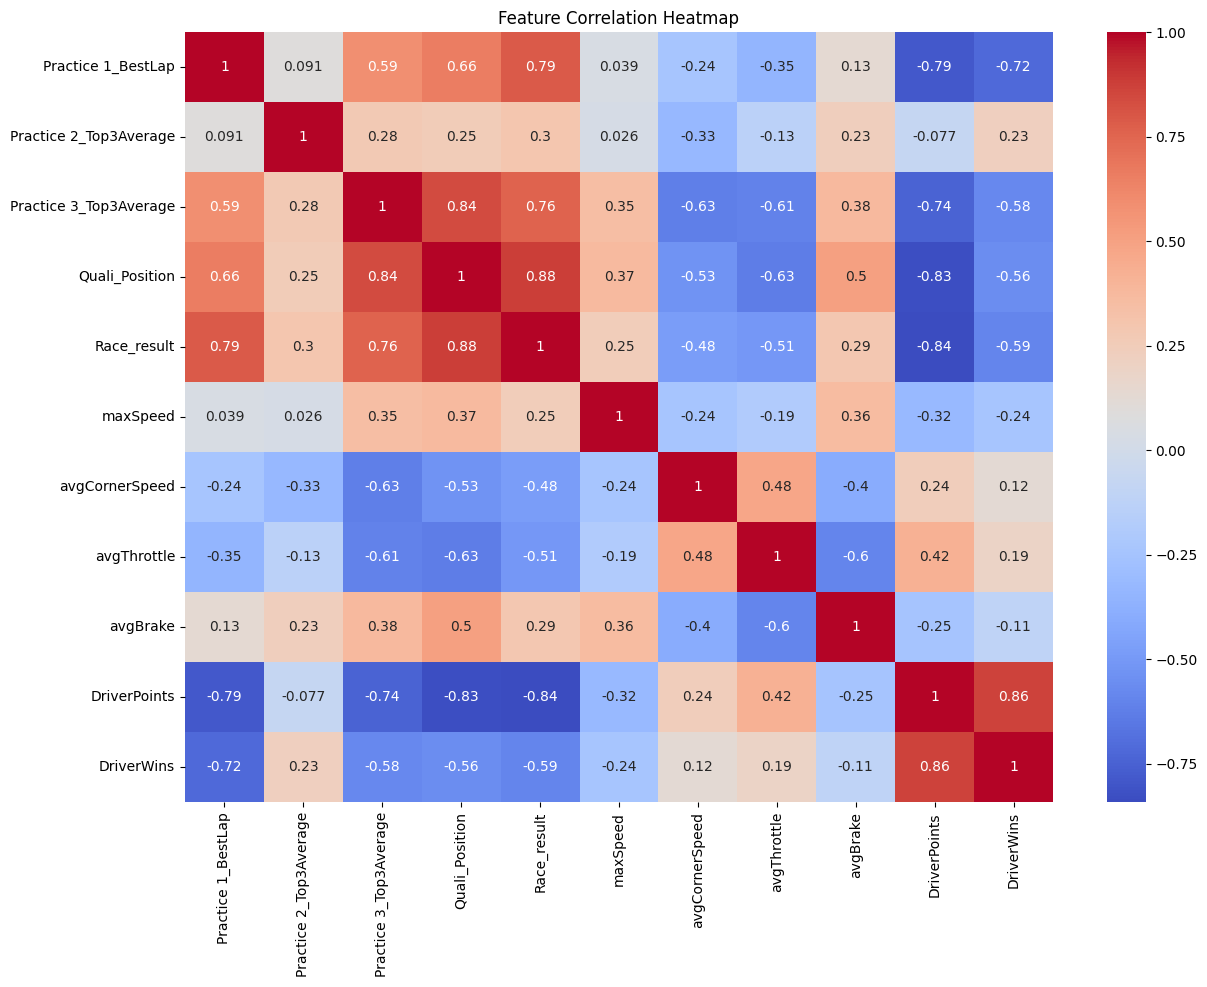

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df_final.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
df_corr = df_final.select_dtypes(include='number') 
correlations = df_corr.corr()['Race_result'].sort_values(ascending=False)
print("Correlation of each feature with Race_result:\n")
print(correlations)

Correlation of each feature with Race_result:

Race_result               1.000000
Quali_Position            0.880567
Practice 1_BestLap        0.787970
Practice 3_Top3Average    0.755844
Practice 2_Top3Average    0.299587
avgBrake                  0.289718
maxSpeed                  0.249963
avgCornerSpeed           -0.481048
avgThrottle              -0.506663
DriverWins               -0.590540
DriverPoints             -0.842078
Name: Race_result, dtype: float64


In [29]:
df_final.to_csv("../data/processed/monza_2024_full_features.csv", index=False)

In [30]:
df_final1 = df_final.copy()

MAE: 3.23


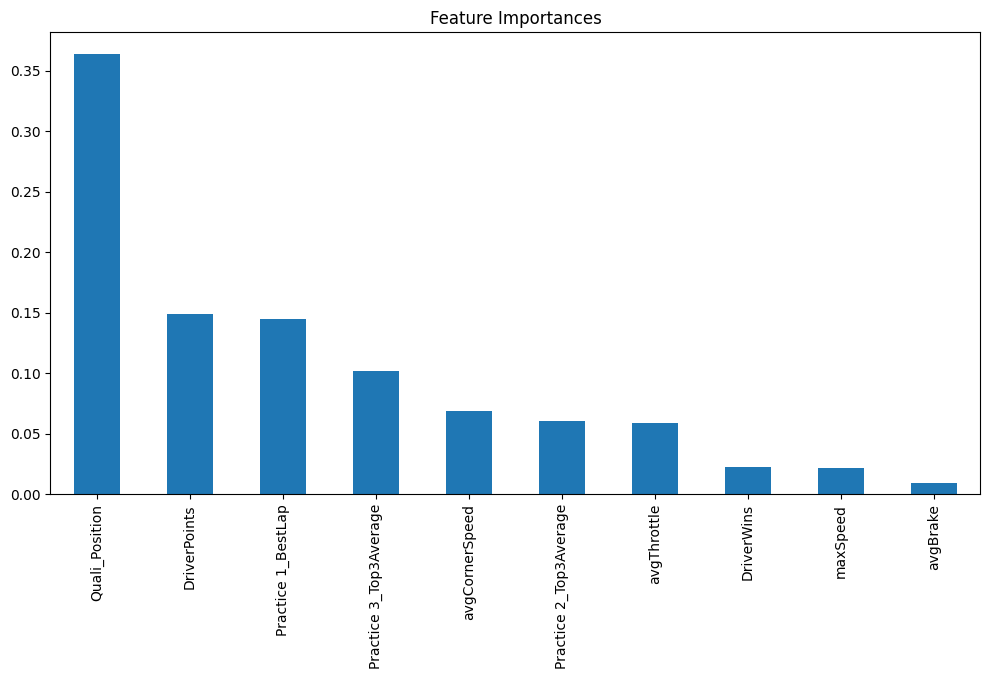

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = df_final.drop(columns=[
    'Driver', 'Constructor', 'Race_result'
])
target = df_final['Race_result']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae:.2f}")

importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.show()


Dropping the columns due to negative corelation

avgCornerSpeed

avgThrottleSpeed

DriverWins

DriverPoints

In [34]:
low_corr_features = ['DriverWins', 'DriverPoints', 'avgCornerSpeed', 'avgThrottle']
df = df_final.copy()
df_filtered = df.drop(columns=low_corr_features)

In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    "n_estimators": [100, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}
model = XGBRegressor(random_state=42)
grid = GridSearchCV(model, param_grid=params, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best MAE:", -grid.best_score_)

Best MAE: 3.3366634845733643


In [37]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 1.5]
}
model = XGBRegressor(random_state=42)
rand_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=1
)

rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_
print("Best MAE:", -rand_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best MAE: 2.5132319688797


lets add car pace data

In [47]:
import fastf1
from fastf1 import get_event_schedule
import pandas as pd
from datetime import datetime

fastf1.Cache.enable_cache('../data/raw')
schedule = get_event_schedule(2024)
schedule = schedule[schedule['EventFormat'] != 'Testing']  

past_rounds = schedule[schedule.index < 16]
print(f"Rounds before Monza GP (16):")
display(past_rounds[['RoundNumber', 'EventName', 'Country', 'Location']])


Rounds before Monza GP (16):


,RoundNumber,EventName,Country,Location
0,0,Pre-Season Testing,Bahrain,Sakhir
1,1,Bahrain Grand Prix,Bahrain,Sakhir
2,2,Saudi Arabian Grand Prix,Saudi Arabia,Jeddah
3,3,Australian Grand Prix,Australia,Melbourne
4,4,Japanese Grand Prix,Japan,Suzuka
5,5,Chinese Grand Prix,China,Shanghai
6,6,Miami Grand Prix,United States,Miami
7,7,Emilia Romagna Grand Prix,Italy,Imola
8,8,Monaco Grand Prix,Monaco,Monaco
9,9,Canadian Grand Prix,Canada,Montréal


In [ ]:
from collections import defaultdict
fastf1.Cache.enable_cache('../data/raw')

schedule = get_event_schedule(2024)
schedule = schedule[schedule['EventFormat'] != 'Testing']

monza_round = 16
past_rounds = schedule[schedule.index < monza_round]
qualifying_positions = defaultdict(list)
race_deltas = defaultdict(list)

for rnd in past_rounds.index:
    try:
        event = fastf1.get_event(2024, rnd)
        print(f"Processing {event['EventName']} ({rnd})...")
        session_quali = event.get_session('Q') 
        session_quali.load()
        for drv in session_quali.results.itertuples():
            driver_code = drv.Abbreviation
            if drv.Position > 0:
                qualifying_positions[driver_code].append(drv.Position)

        # RACE
        session_race = event.get_session('R')
        session_race.load()
        
        laps = session_race.laps.pick_quicklaps()
        if laps.empty:
            continue
        
        fastest_lap = laps.pick_fastest()
        fastest_time = fastest_lap['LapTime'].total_seconds()

        for drv in laps['Driver'].unique():
            drv_laps = laps.pick_driver(drv)
            if drv_laps.empty:
                continue
            best_lap = drv_laps.pick_fastest()
            delta = best_lap['LapTime'].total_seconds() - fastest_time
            race_deltas[drv].append(delta)

    except Exception as e:
        print(f"Skipping round {rnd} due to error: {e}")
        continue


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Skipping round 0 due to error: Cannot get testing event by round number!
Processing Bahrain Grand Prix (1)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count

Processing Saudi Arabian Grand Prix (2)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap

Processing Australian Grand Prix (3)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
